In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

# SORR

In [48]:
data = pd.read_csv('states_all.csv') 

#interpolate ederek NAN degerleri doldurdum


columns = data.columns[2:]
for column in columns:
    for state in data.STATE.unique():
         data[column] = data.loc[data.STATE == state,column].interpolate()

pd.options.display.float_format = '{:.1f}'.format
data

   

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1992_ALASKA,ALASKA,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1992_ARIZONA,ARIZONA,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,1992_ARKANSAS,ARKANSAS,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1992_CALIFORNIA,CALIFORNIA,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1914,2017_RHODE_ISLAND,RHODE_ISLAND,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [41]:
states = data.STATE.unique()

for state in states:
    data.TOTAL_REVENUE = data.TOTAL_REVENUE.interpolate()
    data.TOTAL_EXPENDITURE = data.TOTAL_EXPENDITURE.interpolate()

data.describe()
pd.options.display.float_format = '{:.1f}'.format
data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,nan,nan,731634.0,208.3,252.2,208.0,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,nan,nan,122487.0,nan,nan,nan,258.9
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,nan,nan,673477.0,215.3,265.4,206.2,262.2
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,nan,nan,441490.0,210.2,256.3,208.6,264.6
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,nan,nan,5254844.0,208.4,260.9,196.8,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2017_NORTH_DAKOTA,NORTH_DAKOTA,2017,nan,2044669.0,nan,nan,nan,2034229.0,nan,...,nan,nan,nan,nan,nan,nan,244.2,288.2,221.5,262.7
1914,2017_RHODE_ISLAND,RHODE_ISLAND,2017,nan,2044669.0,nan,nan,nan,2034229.0,nan,...,nan,nan,nan,nan,nan,nan,237.6,277.2,223.4,269.6
1915,2017_SOUTH_CAROLINA,SOUTH_CAROLINA,2017,nan,2044669.0,nan,nan,nan,2034229.0,nan,...,nan,nan,nan,nan,nan,nan,234.0,274.7,213.1,265.8
1916,2017_SOUTH_DAKOTA,SOUTH_DAKOTA,2017,nan,2044669.0,nan,nan,nan,2034229.0,nan,...,nan,nan,nan,nan,nan,nan,241.6,286.4,221.8,259.8


# ODEV 1
Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?



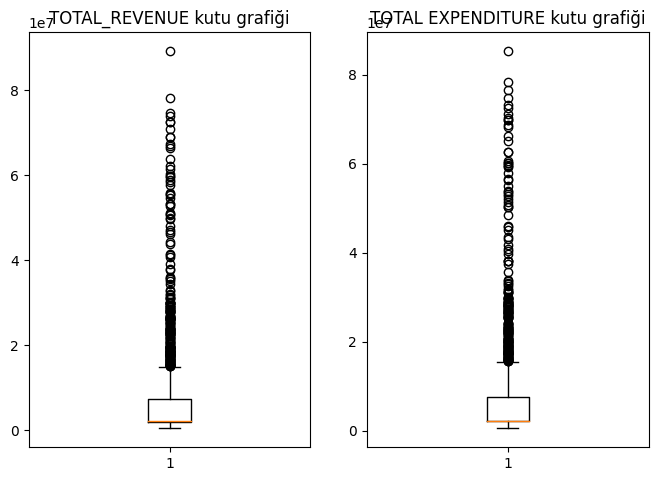

In [8]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

plt.subplot(121)
plt.boxplot(data["TOTAL_REVENUE"] )
plt.title("TOTAL_REVENUE kutu grafiği")


plt.subplot(122)
plt.boxplot(data["TOTAL_EXPENDITURE"])
plt.title("TOTAL EXPENDITURE kutu grafiği")
plt.show()

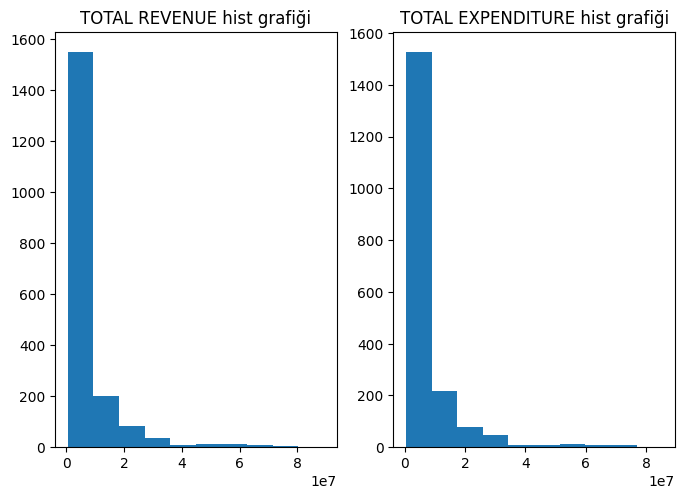

In [9]:
#histogtam ile bakalım

plt.subplot(121)
plt.hist(data["TOTAL_REVENUE"], )
plt.title("TOTAL REVENUE hist grafiği")

plt.subplot(122)
plt.hist(data["TOTAL_EXPENDITURE"], )
plt.title("TOTAL EXPENDITURE hist grafiği")

plt.show()

In [17]:
#aykırı degerlerın sayısını bulalım

def aykiri(veriler):
    q75, q25 = np.percentile(veriler, [75 ,25])
    caa = q75 - q25
    
    esik_degerler=pd.DataFrame()
    
    for esik_degeri in np.arange(1,5.5,0.5):
        min_deger = q25 - (caa*esik_degeri)
        maks_deger = q75 + (caa*esik_degeri)
    
        aykiri_deger_sayisi = len((np.where((veriler > maks_deger)| 
                                       (veriler < min_deger))[0]))
    
        esik_degerler = esik_degerler.append({'Eşik Değeri': esik_degeri,'Aykırı Değer Sayısı': aykiri_deger_sayisi}, ignore_index=True)
    
    return esik_degerler

# SOR
Esık degerı ve aykırı deger sayısı kolonunun sıralaması?

In [18]:
aykiri(data.TOTAL_REVENUE)

,Aykırı Değer Sayısı,Eşik Değeri
0,265.0,1.0
1,209.0,1.5
2,173.0,2.0
3,137.0,2.5
4,118.0,3.0
5,97.0,3.5
6,74.0,4.0
7,57.0,4.5
8,50.0,5.0


In [12]:
aykiri(data.TOTAL_EXPENDITURE)

,Aykırı Değer Sayısı,Eşik Değeri
0,254.0,1.0
1,202.0,1.5
2,164.0,2.0
3,134.0,2.5
4,110.0,3.0
5,96.0,3.5
6,67.0,4.0
7,56.0,4.5
8,50.0,5.0


# ODEV 2
Aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

In [29]:
from scipy.stats.mstats import winsorize

winsorize_TOTAL_REVENUE = winsorize(data["TOTAL_REVENUE"], (0, 0.10))

winsorize_TOTAL_EXPENDITURE = winsorize(data["TOTAL_EXPENDITURE"], (0, 0.05))
winsorize_TOTAL_REVENUE 

masked_array(data=[2678885., 1049591., 3258079., ..., 2044669., 2044669.,
                   2044669.],
             mask=False,
       fill_value=1e+20)

In [27]:
winsorize_TOTAL_REVENUE.max()


11709885.0

# SOR
BURADA AYKIRI DEGERLERIN BUYUK OLMASINDAN DOLAYI  WINSORIZE EDELIM? 10% denedim hala aykırı deger gordum  o yuzden 15 e cektım. Fakat gorsellestırmeden anlamanın yolu var mı?

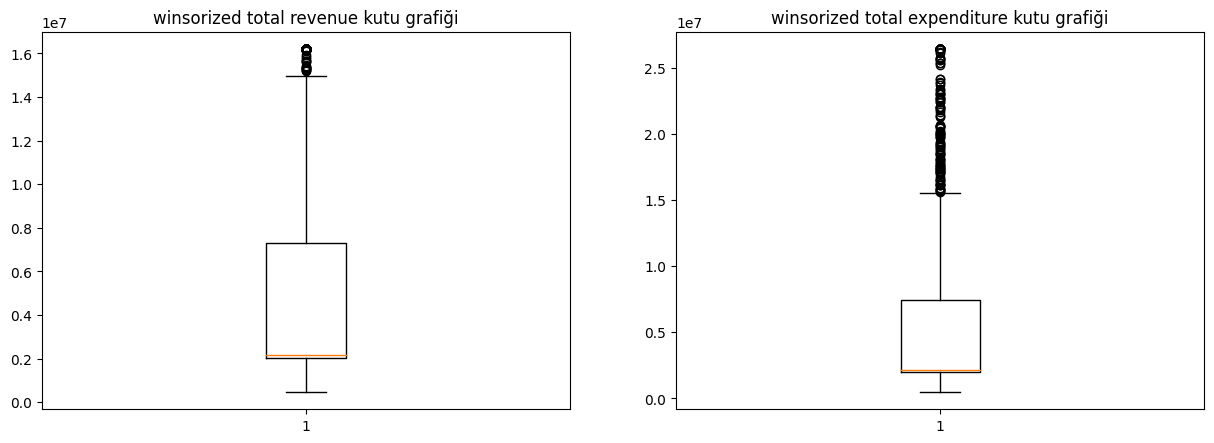

In [30]:

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.boxplot(winsorize_TOTAL_REVENUE)
plt.title("winsorized total revenue kutu grafiği")

plt.subplot(122)
plt.boxplot(winsorize_TOTAL_EXPENDITURE)
plt.title("winsorized total expenditure kutu grafiği")
plt.show()

In [31]:
print(aykiri(winsorize_TOTAL_REVENUE))

print(aykiri(winsorize_TOTAL_EXPENDITURE))


   Aykırı Değer Sayısı  Eşik Değeri
0                265.0          1.0
1                209.0          1.5
2                  0.0          2.0
3                  0.0          2.5
4                  0.0          3.0
5                  0.0          3.5
6                  0.0          4.0
7                  0.0          4.5
8                  0.0          5.0
   Aykırı Değer Sayısı  Eşik Değeri
0                254.0          1.0
1                202.0          1.5
2                164.0          2.0
3                134.0          2.5
4                110.0          3.0
5                 96.0          3.5
6                  0.0          4.0
7                  0.0          4.5
8                  0.0          5.0


# ODEV3
Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

In [ ]:
data['butce_acigi'] = data.TOTAL_REVENUE - data.TOTAL_EXPENDITURE
data.butce_acigi

In [ ]:
plt.boxplot(data.butce_acigi)
plt.title("bütçe açığı kutu grafiği")
plt.show()

In [ ]:
aykiri(data.butce_acigi)


In [ ]:
#fazla olan aykırı degerleri de temizleyelim

winsorize_butce_acigi = winsorize(data['butce_acigi'], (0, 0.90))
winsorize_butce_acigi



# SOR
BURADA CIFT YONLU WINSORIZE MI YAPMAM GEREKIR EKSI DEGERLER DE VAR?

In [ ]:
plt.figure(figsize = (15,5))
plt.boxplot(butce_acigi)
plt.title("butce_acigi kutu grafiği")



# ODEV 4
Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

In [ ]:
winsorize_butce_acigi = winsorize_TOTAL_REVENUE - winsorize_TOTAL_EXPENDITURE

plt.boxplot(winsorize_butce_acigi)
plt.title('Winsorize değerler ile bütçe açığı kutu grafiği')
plt.show()

In [ ]:
aykiri(winsorize_butce_acigi)


In [ ]:
winsorize_butce = winsorize(winsorize_butce_acigi, (0.15, 0.15))
aykiri(winsorize_butce)


In [ ]:
plt.boxplot(winsorize_butce)
plt.title('Winsorized bütçe  kutu grafiği')
plt.show()